## Titanic

##### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier

#### Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test["Survived"] = None

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,None
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,None
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,None
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,None
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,None


##### We will join our train and test set to prepare data for analysis

In [7]:
df = pd.concat([train,test], join = 'inner')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


##### As you can see below we have missing value problems

In [11]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Handling NA Values

##### First Lets take careful look at our missing values with using the function below

In [12]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [13]:
na_columns = missing_values_table(df, na_name=True)

          n_miss  ratio
Cabin       1014  77.46
Survived     418  31.93
Age          263  20.09
Embarked       2   0.15
Fare           1   0.08


In [14]:
df["Fare"].fillna(df["Fare"].mean(), inplace = True)
df.Embarked.fillna(df["Embarked"].mode()[0], inplace = True)

In [15]:
na_columns = missing_values_table(df, na_name=True)

          n_miss  ratio
Cabin       1014  77.46
Survived     418  31.93
Age          263  20.09


##### Above we filled the missing values with mean and mode as we have not many missing values in Fare and Embarked variables
##### On the other hand we have 263 missing values missing in Age. We will fill the missing age values by using the titles of people. We will create another variable by extracting the titles from the "Name" variable. And then we will fill the missing values with the mean of age of people sharing the same title.

In [16]:
df['NEW_TITLE'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_TITLE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


##### As you can see above we created the New Title variable. 

In [18]:
df["Age"] = df["Age"].fillna(df.groupby("NEW_TITLE")["Age"].transform("median"))

##### Above we filled the missing values as explained earlier.Lets see

In [19]:
na_columns = missing_values_table(df, na_name=True)

          n_miss  ratio
Cabin       1014  77.46
Survived     418  31.93


##### As you can see we have only Cabin variable left with missing values. Lets handle that too.

In [20]:
temp_df = df.copy()
temp_df =temp_df.loc[(temp_df["Survived"].notnull())]
temp_df["Survived"]=temp_df["Survived"].astype(int)
temp_df['NA_FLAG'] = np.where(temp_df["Cabin"].isnull(), 1, 0)
print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(temp_df["NA_FLAG"])["Survived"].mean(),
                            "Count": temp_df.groupby(["NA_FLAG"])["Survived"].count()}), end="\n\n\n")

         TARGET_MEAN  Count
NA_FLAG                    
0           0.666667    204
1           0.299854    687




##### Above we made a template table to check wheter there is a relationship between missing values and our target variable.

##### According to the table above there seems to be a strong ralationship which means passangers with Cabin number assigned have survived two times more than passangers with no Cabin value assigned.

##### Therefore we will create a variable "has_cabin" and fill it with "1" and "0" for passangers assigned Cabin Number and Passengers without cabin mumber

In [21]:
df['has_cabin'] = np.where(df["Cabin"].isnull(), 1, 0)
df.drop("Cabin", axis=1,inplace = True)

In [22]:
na_columns = missing_values_table(df, na_name=True)

          n_miss  ratio
Survived     418  31.93


##### As you can see only the target variable left with NA values. We have finished handling missing data problem as the missing values in Survived column are the values came from Test set which is expected of us to predict

### Feature Engineering

##### As we were handling NA values we already perfomed some feature engineering by adding New Title variable and hanging Cabin variable int has_cabin

##### Now lets focus on SibSp and Parch variables which is having siblings on board and having parents on board. We will create a new variable "family_size" out of these 2 variables

In [23]:
df["family_size"] = df["SibSp"] + df["Parch"] + 1
df.drop("SibSp", axis=1,inplace = True)
df.drop("Parch", axis=1,inplace = True)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,NEW_TITLE,has_cabin,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,Mr,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,Mrs,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,Mrs,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,Mr,1,1


### Outliers

##### Lets check if there are outliers in our numerical variables. Lets first grab our numerical variables

In [25]:
num_cols = [col for col in df.columns if len(df[col].unique()) > 20
                and df[col].dtypes != 'O'
                and col not in "PassengerId"]
num_cols

['Age', 'Fare']

##### Lets see the outliers in age

C:\Users\Ringolog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

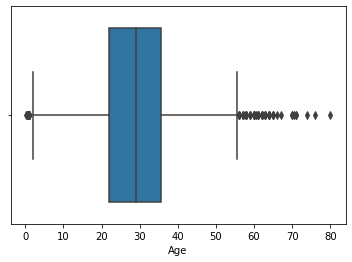

In [26]:
sns.boxplot(df.Age)

##### Lets pressure them down by setting an up limit making use of inter quantile range

In [27]:
def outlier_thresholds(dataframe, col_name):
    quartile1 = dataframe[col_name].quantile(0.20)
    quartile3 = dataframe[col_name].quantile(0.80)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    print(low_limit, up_limit)
    return low_limit, up_limit

In [28]:
low_limit, up_limit = outlier_thresholds(df,"Age")

-6.0 66.0


##### Now we will replace Age values with the second value above

In [29]:
df.loc[(df["Age"] > up_limit), "Age"] = up_limit

C:\Users\Ringolog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

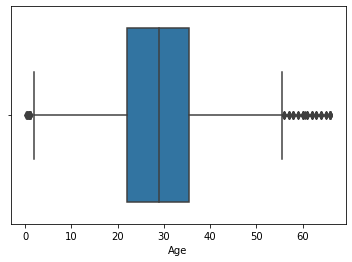

In [30]:
sns.boxplot(df.Age)

##### As you can see above we pressured down some highest age values.

##### Now we will do same thing to Fare variable

##### Lets see the outliers in age

C:\Users\Ringolog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

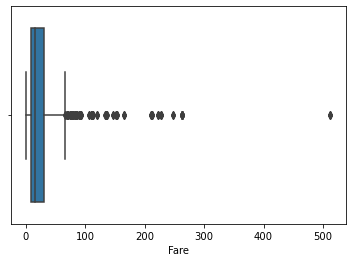

In [31]:
sns.boxplot(df.Fare)

##### As you can see above some of the values are very high. We need to pressure them down too.

In [32]:
low_limit, up_limit = outlier_thresholds(df,"Fare")

-42.73330000000001 92.1667


In [33]:
df.loc[(df["Fare"] > up_limit), "Fare"] = up_limit

C:\Users\Ringolog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

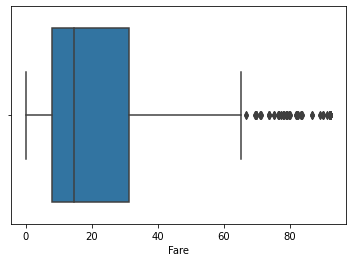

In [34]:
sns.boxplot(df.Fare)

##### As you can see above we pressured down some highest Fare values.

### Rare Encoding

##### Lets see is there any rare values in our data set 

In [35]:
for col in df.columns:
    print(col, ":", df[col].nunique())


PassengerId : 1309
Survived : 2
Pclass : 3
Name : 1307
Sex : 2
Age : 92
Ticket : 929
Fare : 261
Embarked : 3
NEW_TITLE : 18
has_cabin : 2
family_size : 9


In [36]:
rare_columns = [col for col in df.columns if (df[col].value_counts() / len(df) < 0.01).any(axis=None)]
rare_columns

['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'NEW_TITLE', 'family_size']

##### As you can see we have a couple rare values above. However as we are going to drop "PassangerId",'Name' and 'Ticket' variables we will not consider them as rare values.
##### Also "Age","Ticket" and "Family_size" variables are numeric variables. We will not consider the values of these variables as rare
##### On the otherhand "New Title" variable needs our attention as it is a categorical variable and it has 18 unique values

In [37]:
temp_df = df.copy()
temp_df =temp_df.loc[(temp_df["Survived"].notnull())]
temp_df["Survived"]=temp_df["Survived"].astype(int)
print(pd.DataFrame({"COUNT": temp_df["NEW_TITLE"].value_counts(),
                    "RATIO": temp_df["NEW_TITLE"].value_counts() / len(temp_df),
                    "TARGET_MEAN": temp_df.groupby("NEW_TITLE")["Survived"].mean()}).sort_values(by="COUNT",
                                                                     ascending=False))

          COUNT     RATIO  TARGET_MEAN
Mr          517  0.580247     0.156673
Miss        182  0.204265     0.697802
Mrs         125  0.140292     0.792000
Master       40  0.044893     0.575000
Dr            7  0.007856     0.428571
Rev           6  0.006734     0.000000
Major         2  0.002245     0.500000
Col           2  0.002245     0.500000
Mlle          2  0.002245     1.000000
Mme           1  0.001122     1.000000
Ms            1  0.001122     1.000000
Capt          1  0.001122     0.000000
Lady          1  0.001122     1.000000
Jonkheer      1  0.001122     0.000000
Don           1  0.001122     0.000000
Countess      1  0.001122     1.000000
Sir           1  0.001122     1.000000


##### As you can see above we have a lot of rare values in New Title variable. Lets gather all rare values under a title and name it "rare"

In [38]:
tmp = df["NEW_TITLE"].value_counts() / len(df)
rare_labels = tmp[tmp < 0.01].index
df["NEW_TITLE"] = np.where(df["NEW_TITLE"].isin(rare_labels), 'Rare', df["NEW_TITLE"])

##### Lets check out template table again

In [39]:
temp_df = df.copy()
temp_df =temp_df.loc[(temp_df["Survived"].notnull())]
temp_df["Survived"]=temp_df["Survived"].astype(int)
print(pd.DataFrame({"COUNT": temp_df["NEW_TITLE"].value_counts(),
                    "RATIO": temp_df["NEW_TITLE"].value_counts() / len(temp_df),
                    "TARGET_MEAN": temp_df.groupby("NEW_TITLE")["Survived"].mean()}).sort_values(by="COUNT",
                                                                     ascending=False))

        COUNT     RATIO  TARGET_MEAN
Mr        517  0.580247     0.156673
Miss      182  0.204265     0.697802
Mrs       125  0.140292     0.792000
Master     40  0.044893     0.575000
Rare       27  0.030303     0.444444


##### As you can see above we gathered all the rare values in New Title variable that has less than 01% rarity level under a single value "rare"

### Label Encoding and OneHot Encoding

##### For label encoding lets first grab the binary columns

In [40]:
binary_cols = [col for col in df.columns if len(df[col].unique()) == 2]
binary_cols

['Sex', 'has_cabin']

In [41]:
def label_encoder(dataframe, binary_col):
    labelencoder = preprocessing.LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

##### We will use the function above to perform label encoding

In [42]:
for col in binary_cols:
    df = label_encoder(df, col)

In [43]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,NEW_TITLE,has_cabin,family_size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,S,Mr,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C,Mrs,0,2


##### As you can see above we binarized the "Sex" and "has_cabin" variables. "has_cabin" variable was already in binary format as we creat it that way in the first place.

##### Now lets determine the vairables we are going to apply onehot encoding

In [44]:
for col in df.columns:
    print(col, ":", df[col].nunique())

PassengerId : 1309
Survived : 2
Pclass : 3
Name : 1307
Sex : 2
Age : 92
Ticket : 929
Fare : 261
Embarked : 3
NEW_TITLE : 5
has_cabin : 2
family_size : 9


##### As you can see above we have a couple of variables which are consist of more than 2 unique values. But we will perfom on hot encoding to "Embarked" and "New_Title" variables.

##### Because for example Pclass is already an ordinal numeric variable. Family size is also a numeric variable.

In [45]:
df = pd.get_dummies(df, columns=["Embarked","NEW_TITLE"], drop_first=True)

In [46]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,has_cabin,family_size,Embarked_Q,Embarked_S,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,1,2,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,0,2,0,0,0,0,1,0


##### As you can see above we created dummy variables for both Embarked and New Title Variables

##### Now before we move on creating a prediction model lets get rid of the variables we are not going to use in our modals

## Last Touches

In [47]:
df.drop(['PassengerId','Name', "Ticket" ], axis = 1, inplace = True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    object 
 1   Pclass          1309 non-null   int64  
 2   Sex             1309 non-null   int32  
 3   Age             1309 non-null   float64
 4   Fare            1309 non-null   float64
 5   has_cabin       1309 non-null   int64  
 6   family_size     1309 non-null   int64  
 7   Embarked_Q      1309 non-null   uint8  
 8   Embarked_S      1309 non-null   uint8  
 9   NEW_TITLE_Miss  1309 non-null   uint8  
 10  NEW_TITLE_Mr    1309 non-null   uint8  
 11  NEW_TITLE_Mrs   1309 non-null   uint8  
 12  NEW_TITLE_Rare  1309 non-null   uint8  
dtypes: float64(2), int32(1), int64(3), object(1), uint8(6)
memory usage: 84.4+ KB


In [49]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare,has_cabin,family_size,Embarked_Q,Embarked_S,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare
0,0,3,1,22.0,7.2500,1,2,0,1,0,1,0,0
1,1,1,0,38.0,71.2833,0,2,0,0,0,0,1,0


##### As you can see our data is consist of only numerical variables. Only the type of our target variable is Object we will handle it after we seperate our train and test set to start building a prediction modal

In [50]:
train = df[df.notnull().all(axis = 1)]
test = df[df.isnull().any(axis = 1)]
train["Survived"]=train["Survived"].astype(int)
test.drop(['Survived'], axis = 1, inplace = True)

<ipython-input-50-6b0bd5b84987>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Survived"]=train["Survived"].astype(int)
C:\Users\Ringolog\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int32  
 1   Pclass          891 non-null    int64  
 2   Sex             891 non-null    int32  
 3   Age             891 non-null    float64
 4   Fare            891 non-null    float64
 5   has_cabin       891 non-null    int64  
 6   family_size     891 non-null    int64  
 7   Embarked_Q      891 non-null    uint8  
 8   Embarked_S      891 non-null    uint8  
 9   NEW_TITLE_Miss  891 non-null    uint8  
 10  NEW_TITLE_Mr    891 non-null    uint8  
 11  NEW_TITLE_Mrs   891 non-null    uint8  
 12  NEW_TITLE_Rare  891 non-null    uint8  
dtypes: float64(2), int32(2), int64(3), uint8(6)
memory usage: 53.9 KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Sex             418 non-null    int32  
 2   Age             418 non-null    float64
 3   Fare            418 non-null    float64
 4   has_cabin       418 non-null    int64  
 5   family_size     418 non-null    int64  
 6   Embarked_Q      418 non-null    uint8  
 7   Embarked_S      418 non-null    uint8  
 8   NEW_TITLE_Miss  418 non-null    uint8  
 9   NEW_TITLE_Mr    418 non-null    uint8  
 10  NEW_TITLE_Mrs   418 non-null    uint8  
 11  NEW_TITLE_Rare  418 non-null    uint8  
dtypes: float64(2), int32(1), int64(3), uint8(6)
memory usage: 23.7 KB


##### Now we are ready to move on

## Models

##### Lets split our train set to create train and test sets as we do not have target variable in our original test set

In [53]:
y = train["Survived"]
X = train.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

#### Neural Networks

##### We better scale our data before sending it to Neural Network algorithm

In [101]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

##### Now lets create the model

In [88]:
mlpc = MLPClassifier().fit(X_train, y_train)

C:\Users\Ringolog\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [89]:
y_pred = mlpc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8246268656716418

##### Above we made prediction and calculated our accuracy. Lets try to increase our accuracy using grid search method and cross validation

In [90]:
mlpc_params = {"alpha": [0.1, 0.01, 0.005, 0.0001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (50, 30)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


##### Here we created a grid to find the best combination of hiper parameters

In [58]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 5, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.3min finished
C:\Users\Ringolog\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.005, 0.0001],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (50, 30)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [59]:
print("Best Parameters: " + str(mlpc_cv_model.best_params_))

Best Parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}


##### Above is the return of our best conbination of hiper parameters

In [91]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (10, 10, 10),
                          solver = "adam")

##### Above we updated our hiper parameters according to the return of our grid search method and below we fit the model with these new values

In [92]:
mlpc_tuned.fit(X_train, y_train)

C:\Users\Ringolog\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.1, hidden_layer_sizes=(10, 10, 10))

In [93]:
y_pred = mlpc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8097014925373134

##### As you can see above our accuracy score a litle bit less than our base modal

#### Random forest

##### As we do not have to scale our data in tree based algorithms Lets create our train and test set.

In [94]:
y = train["Survived"]
X = train.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

##### Now lets fit our base modal

In [96]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [97]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8097014925373134

##### Above we made prediction and calculated our accuracy. Lets try to increase our accuracy using grid search method and cross validation

In [66]:
rf_params = {"max_depth": [2,5,10],
            "max_features": [2,6,12],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [67]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2) 

In [68]:
rf_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'max_features': [2, 6, 12],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [69]:
print("Best Parameters: " + str(rf_cv_model.best_params_))

Best Parameters: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 500}


In [98]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 2, 
                                  min_samples_split = 10,
                                  n_estimators = 500)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=10,
                       n_estimators=500)

##### Above we updated our hiper parameters according to the return of our grid search method and below we fit the model with these new values

In [99]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8059701492537313

##### As you can see above our accuracy score is the same with our base modal. Now lets take look at feature importances according to our Random Forest modal

Text(0.5, 0, 'Feature Importances')

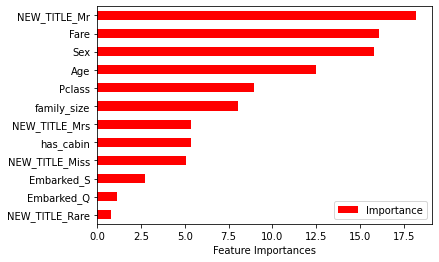

In [100]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Feature Importances")

#### Light GBM

##### Below we fit the Light GBM modal and than calculated the base modals accuracy

In [73]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [74]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7947761194029851

##### Lets try to increase our accuracy as we did earlier with other modals

In [75]:
lgbm_params = {
        'n_estimators': [ 500, 1000, 2000],
        'subsample': [ 0.8, 1.0],
        'max_depth': [3, 5,10],
        'learning_rate': [0.1,0.01,0.001],
        "min_child_samples": [5,10,20]}

In [76]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv = 5, n_jobs = -1, verbose = 2)

In [77]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  2.4min finished


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [500, 1000, 2000],
                         'subsample': [0.8, 1.0]},
             verbose=2)

In [78]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_samples': 10,
 'n_estimators': 500,
 'subsample': 0.8}

##### Above is the best hiper parameter combination return from grid search method. We configure our modal below wtih these parameters

In [79]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                    max_depth = 3,
                    min_samples_split = 10,
                    n_estimators = 500,
                    subsample = 0.8)

In [80]:
lgbm_tuned =  lgbm.fit(X_train,y_train)

In [82]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8022388059701493

##### As you can see modal tuning seems to be worked out

### Comparing the Modals

In [106]:
modals = [mlpc_tuned, rf_tuned, lgbm_tuned]
for m in modals:
    names = m.__class__.__name__
    y_pred = m.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
MLPClassifier:
Accuracy: 80.9701%
----------------------------
RandomForestClassifier:
Accuracy: 79.4776%
----------------------------
LGBMClassifier:
Accuracy: 79.1045%


##### As you can see above we compared the modals and they seems to similar accuracy score.
##### Since I like Random_Forest the most lets fit all of our train data with this modal and predict the test set

In [107]:
y = train["Survived"]
X = train.drop(['Survived'], axis=1)


In [108]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 2, 
                                  min_samples_split = 10,
                                  n_estimators = 500)

rf_tuned.fit(X, y)

RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=10,
                       n_estimators=500)

In [109]:
y_pred = rf_tuned.predict(test)

##### Above we made the predictions and below we are putting our predictions to the submission document

In [110]:
gender_submission = pd.read_csv('gender_submission.csv', index_col = 0)

In [111]:
gender_submission["Survived"] = y_pred

In [112]:
gender_submission.to_csv("RF.csv", index = False)

##### Above we filled the table with our predictions and below we are checking if it all worked out

In [113]:
RF = pd.read_csv('RF.csv')

In [114]:
RF.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


##### It seems we are ready to submit our results
